# Exercise 3: Learning from Data

In this exercise, you will train different types of regression and classification models on two datasets. You will be graded based on a combination of your code producing the expected results, your written responses to the questions and a passing leaderboard score in the final exercise.

### 3.1 Linear / Logistic Regression for digit recognition

In this part you will experiment with two different types of prediction models, and qualitatively + quantitatively compare them. You will be working with the classic MNIST dataset, which we can load from `sklearn.datasets`.

In [11]:
# Importing the dataset
from sklearn import datasets

digits = datasets.load_digits()

Here we plot the first few digits and their labels. Apparently they are in order, but our upcoming models will not rely on this.

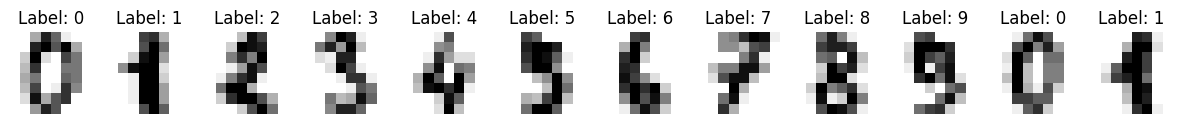

In [12]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=12, figsize=(15, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

### A: Warmup Exercise

Use the `train_test_split` function from `sklearn.model_selection` twice to split the data into train, validation, and test sets, with a distribution of 80%, 10%, and 10% respectively. Use `random_state=0` for reproducibility.
Check out the documentation to figure out how to set the parameters to get the desired split. 

In [13]:
from sklearn import model_selection

X_train, X_rest, y_train, y_rest= model_selection.train_test_split(digits.images, digits.target, train_size=0.8, random_state=0)
X_test, X_val, y_test, y_val = model_selection.train_test_split(X_rest, y_rest, train_size=0.5, random_state=0)

Now let's check out the returned training data, which is of the type `numpy.ndarray`, which you might have seen already. We want to make sure the classes are balanced, e.g. we don't have a lot more 4's than 5's.
 - How many images do we have for the train, validation, and test sets?
 - What is the distribution of the training labels? Comment on whether the classes are balanced.

In [14]:
import numpy as np

#Counting the different numbers in my training, test and validation data
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)
unique_val, counts_val = np.unique(y_val, return_counts=True)

#illustrating
print("Distributions for the training data: ")
for number, count in zip(unique_train, counts_train):
    print(str(number) + " occured " + str(count) + " " * (3-len(str(count))) + " times " + 
          "-" * round(100 * count/sum(counts_train)))
    
print("Distributions for the test data: ")
for number, count in zip(unique_test, counts_test):
    print(str(number) + " occured " + str(count) + " " * (3-len(str(count))) + " times " + 
          "-" * round(100 * count/sum(counts_test)))

print("Distributions for the validation data: ")
for number, count in zip(unique_val, counts_val):
    print(str(number) + " occured " + str(count) + " " * (3-len(str(count))) + " times " + 
          "-" * round(100 * count/sum(counts_val)))

Distributions for the training data: 
0 occured 151 times -----------
1 occured 147 times ----------
2 occured 141 times ----------
3 occured 154 times -----------
4 occured 151 times -----------
5 occured 142 times ----------
6 occured 137 times ----------
7 occured 140 times ----------
8 occured 135 times ---------
9 occured 139 times ----------
Distributions for the test data: 
0 occured 13  times -------
1 occured 16  times ---------
2 occured 18  times ----------
3 occured 14  times --------
4 occured 16  times ---------
5 occured 19  times -----------
6 occured 25  times --------------
7 occured 19  times -----------
8 occured 19  times -----------
9 occured 21  times ------------
Distributions for the validation data: 
0 occured 14  times --------
1 occured 19  times -----------
2 occured 18  times ----------
3 occured 15  times --------
4 occured 14  times --------
5 occured 21  times ------------
6 occured 19  times -----------
7 occured 20  times -----------
8 occured 20  tim

As we can see, the test data has a low number of 8's, which could lead to very loose criteria for what an 8 can look like. This should not be too bad, but it would be better if we had an overall equal distribution of all numbers, so we can test that our model is not skewed (maybe it guesses 8).

### B: Programming Exercise

Let's build a model that learns to predict the digit given the image. We'll first try our hand at linear regression. We will use the `LinearRegression` class from `sklearn.linear_model`. Again, check out the documentation on how to use it. We will use the `fit` method to train the model, and the `predict` method to make predictions on the test set.
Afterwards, evaluate the model using functions from `sklearn.metrics` module.

LinearRegression MSE:  4.3195902478008
LinearRegression accuracy:  0.18888888888888888


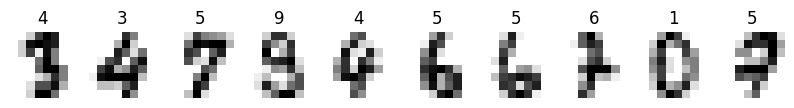

In [15]:
from sklearn import linear_model
from sklearn import metrics

def reshape_2d (array_3d):
    """turn 3d array into 2d array"""
    return array_3d.reshape(array_3d.shape[0], -1)

#create linear model
model_linear = linear_model.LinearRegression()
model_linear.fit(reshape_2d(X_train), y_train)

#make predictions
y_pred = model_linear.predict(reshape_2d(X_test))

#test predictions
mse = metrics.mean_squared_error(y_test, y_pred)
acc = metrics.accuracy_score(y_test, y_pred.astype(int))

# DO NOT INSERT OR CHANGE ANYTHING BELOW
print("LinearRegression MSE: ", mse)
print("LinearRegression accuracy: ", acc)

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % prediction)

### C: Programming Exercise

Now, let's model the task differently.
You will use the `LogisticRegression`, again included in the module `sklearn.linear_model`, and again, check out the documentation to see how to use it. Fit the model and make predictions on the test set. 

You are asked to produce output with the same structure as in the above programming exercise (two printouts and one image), but for a different model this time.

C:\Users\Maher\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression MSE:  0.8444444444444444
LogisticRegression accuracy:  0.9611111111111111


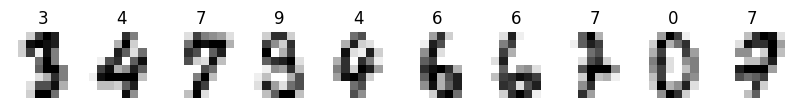

In [16]:
#create logistic model
model_logistic = linear_model.LogisticRegression()
model_logistic.fit(reshape_2d(X_train), y_train)

#make predictions
y_pred = model_logistic.predict(reshape_2d(X_test))

#test predictions
mse = metrics.mean_squared_error(y_test, y_pred)
acc = metrics.accuracy_score(y_test, y_pred.astype(int))

# DO NOT INSERT OR CHANGE ANYTHING BELOW
print("LogisticRegression MSE: ", mse)
print("LogisticRegression accuracy: ", acc)

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % prediction)

### Written Questions

##### 1a) "Describe the trends you observe in the results. Is there anything interesting or unexpected?"
 We can observe that the logistic model is very good at predicting numbers having an accuracy of 97,7%. The model fails at predicting a 7 and thinks it is an 8. This can be due to how pixelated the images are, making the model think many dark pixels is always an 8. This problem might not be noticed as much, since we are not tesing many 8's.
##### 1b) "How do the results compare to the linear regression model?"
We see that the linear regression is much worse that the logistic model, with an accuracy of 24,0%.
##### 1c) "What do you think is the reason for this?"
 Since we are using classified data, we cannot rely on linear regression, which can only predict quantity, and must use logistic regression can be used for classified predictions.

## Exercise 3.2: Counting stars

Your team is tasked with applying data science and machine learning techniques to some recently collected telescope image data. The telescope takes low resolution images, in which stars either appear as squares or circles. Your task is to train a classifier to determine whether there are more circular stars than square stars in each image. The budget is tight this year so there are no resources available to train expensive deep neural networks; you will need to train a linear or logistic regression classifier instead.

You are encouraged to be creative, and to try out different things empirically, too. Preprocessing could be crucial to the success of your model. Good luck!

Below is a sample of the data you'll be working with. Above each image is the label, which shows the number of circular and square stars, respectively. We do not count the small noisy background stars. 

![](sample.png)

### D: Programming Exercise

1. Create an account on Kaggle to collect the data https://www.kaggle.com/competitions/gds-exercise-3/. You can either use your real name, or tell us your Kaggle username, so we can grade you.
2. Download the training data from https://www.kaggle.com/competitions/gds-exercise-3/data. Check out the Dataset Description for more information about the data and your task.
2. Load the training data file `stars_train_X_y.npz` and split it into `train`, `val`, and `test` splits.
3. Use a linear or logistic regression model to fit the `train` data. Use the `val` and `test` splits for model selection and hyperparameter optimization. (You should measure performance using accuracy).

--  Model for finding stars --

NEW BEST: accuracy: 0.7725
NO RESULT: model number 2
NEW BEST: accuracy: 0.885
SUCCES: model found with transformation (-2.15777925025738, -0.6603820465274337)


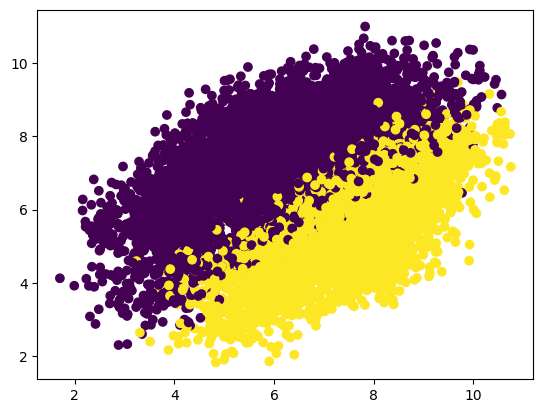

In [54]:
import numpy as np
import random as rd

#importing data
data = np.load("stars_train_Xy.npz")
X = data["X_train"] #   np.ndarray of size (8000, 4096),  flattened image (64x64) of the night sky
y = data["y_train"] #   np.ndarray of size (8000, 2), number of circular stars and number square stars

#split data into train = 90% and test = 10%
split_data =  model_selection.train_test_split(X, y, train_size=0.9, random_state=0)

def transform_X(transformation, X):
    """Transform X data using transformation variable."""
    num_samples = X.shape[0]
    X = X.reshape(num_samples, 64, 64)
    if transformation > 0: X = np.std(np.cos(X - transformation), axis=(1, 2))
    else: X = np.std(np.sin(X - transformation), axis=(1, 2))
    return X.reshape(-1, 1)

def train_lin_model(transformations):
    """Train lin model on the X_train and test it
    return: tuple of model and accuracy"""
    
    #split data into train = 90% and test = 10%
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.9, random_state=0)
    
    #transforming X_train and X_test for each model
    circle_transformation, square_transformation = transformations
    X_train_circle, X_train_square = transform_X(circle_transformation, X_train), transform_X(square_transformation, X_train)
    X_test_circle, X_test_square = transform_X(circle_transformation, X_test), transform_X(square_transformation, X_test)

    #create two seperate models: ircular stars and square stars, since linear models are good for predicting quantity
    model_circle = linear_model.LinearRegression()
    model_square = linear_model.LinearRegression()
    model_circle.fit(X_train_circle, np.array([element[0] for element in y_train]))
    model_square.fit(X_train_square, np.array([element[1] for element in y_train]))
    
    #test accuracy of predictions from both models
    y_pred_circle = model_circle.predict(X_test_circle)
    y_pred_square = model_square.predict(X_test_square)
    accuracy = metrics.accuracy_score(np.array([int(element[0] > element[1]) for element in y_test]), 
                                      np.array([int(element[0] > element[1]) for element in zip(y_pred_circle, y_pred_square)]))
    
    return model_circle, model_square, accuracy

def tune_parameters(test_limit: int):
    """Test random weights to find the one with highest accuracy.
    return: the best logistic model to classify the stars"""
    best_accuracy = 0
    transformations = 0
    
    #test until succes or test limit
    for i in range(test_limit):
        transformations = (rd.random() * 6 - 3, rd.random() * 6 - 3)
        model_circle, model_square, accuracy = train_lin_model(transformations)
        
        if accuracy > 0.89:
            print("SUCCES: model found with transformation " + str(transformations))
            return model_circle, model_square, transformations[0], transformations[1]
        
        if accuracy > best_accuracy: 
            best_models = model_circle, model_square,
            best_accuracy, best_transformations = accuracy, transformations
            print("NEW BEST: accuracy: " + str(accuracy))
        else:
            print("NO RESULT: model number " + str(i + 1))
            
    print("FAILED: achieved accuracy of: " + str(best_accuracy) + " and transformation " + str(best_transformations))
    return best_models[0], best_models[1], best_transformations[0], best_transformations[1]

#creating two models
print("--  Model for finding stars --\n")
model_circle, model_square, transformation_circle, transformation_square = tune_parameters(10)

#drawing models and distance between points
circle_data = model_circle.predict(transform_X(transformation_circle, X))
square_data = model_square.predict(transform_X(transformation_square, X))
distance_data = np.array([int(element[0] > element[1]) for element in y])

plt.scatter(circle_data,
            square_data,
            c=distance_data)

### E: Unlabelled data evaluation

You should download the unlabeled test data from https://www.kaggle.com/competitions/gds-exercise-3/data and make predictions for all of the unlabeled images in the test set. You can submit your best predictions to Kaggle three times/day.

The course responsible has submitted a naive baseline and we're sure you can beat that score! This programming exercise is considered passed if you achieve  $\text{Score} \ge 0.85$ on the leaderboard.

In [55]:
#importing data
data_unlabeled = np.load("stars_test_X.npz")
X = data_unlabeled["X_test"]

#repeat method for final predictions
X_circle, X_square = transform_X(transformation_circle, X), transform_X(transformation_square, X)

y_pred = np.array([int(circle > square) for circle, square in 
                   zip(model_circle.predict(X_circle), model_square.predict(X_square))])

output_file = "prediction.csv"

# DO NOT INSERT OR CHANGE ANYTHING BELOW
import numpy as np
# Use this function to save your predictions on stars_test_X.npz to a "prediction.csv" file.
# The produced csv file can be directly uploaded to Kaggle for evaluation.
def y_pred_to_kaggle_format (y_pred : np.ndarray) -> None:
    np.c_[np.arange(1, len(y_pred)+1), y_pred]
    np.savetxt(output_file, np.c_[np.arange(1, len(y_pred)+1), y_pred], fmt='%i', delimiter=",", header="Id,Category", comments='')

y_pred_to_kaggle_format(y_pred)

# NOW YOU CAN UPLOAD THE prediction.csv FILE TO KAGGLE AND SEE YOUR ACCURACY

### Written Questions

2a) Explain the different techniques and their purpose in your code for Programming Exercise D.

Centering the models in different places proved usefull. 

2b) Which techniques were not useful in improving performance on this task?

Doing the models seperately or combining them ina logistical model. 